In [306]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

### Linear Regression and Learning Curve challenges


##### Challenge 1

Generate (fake) data that is linearly related to `log(x)`.

You are making this model up. It is of the form `B0 + B1*log(x) + epsilon`. (You are making up the parameters.)

Simulate some data from this model.

Then fit two models to it:

 * quadratic (second degree polynomial)
 * logarithmic (`log(x)`)

(The second one should fit really well, since it has the same form as the underlying model!)

In [307]:
x_1 = np.random.uniform(1,501,200)
epsilon = np.random.uniform(-1,1, size=(200,))
y_1 = 3 + 1.5 * np.log(x_1) + epsilon

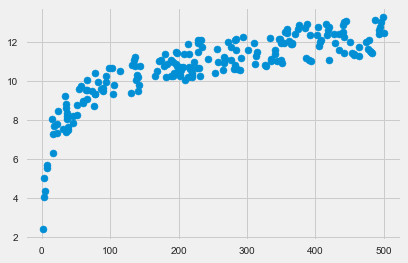

In [308]:
plt.scatter(x_1,y_1)

In [309]:
lr = LinearRegression()
interactions = PolynomialFeatures(degree=2, interaction_only=False)

In [310]:
poly_x = interactions.fit_transform(sm.add_constant(x_1))

In [311]:
lr.fit(poly_x, y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [312]:
lr.score(poly_x, y_1)

0.78086717755491764

In [313]:
quad_pred_y = lr.predict(poly_x)

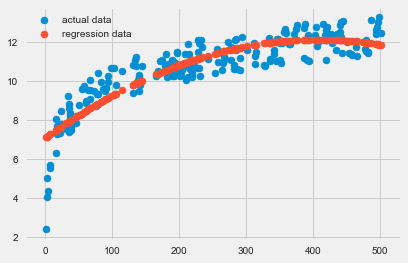

In [314]:
plt.scatter(x_1,y_1, label="actual data")
plt.scatter(x_1, quad_pred_y, label="regression data")
plt.legend()

In [315]:
log_x = np.vstack([[i, np.log(i)] for i in x_1])

In [316]:
lr_log = LinearRegression()

In [317]:
lr_log.fit(log_x, y_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [318]:
y_log_pred = lr_log.predict(log_x)

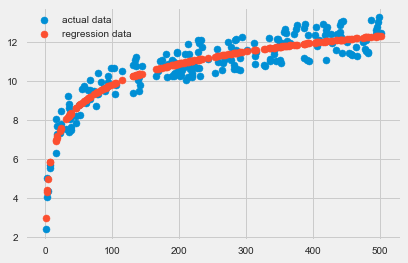

In [319]:
plt.scatter(x_1,y_1, label="actual data")
plt.scatter(x_1, y_log_pred, label="regression data")
plt.legend()


##### Challenge 2

Generate (fake) data from a model of the form `B0 + B1*x + B2*x^2 + epsilon`. (You are making up the parameters.)

Split the data into a training and test set.

Fit a model to your training set. Calculate mean squared error on your training set. Then calculate it on your test set.

(You could use `sklearn.metrics.mean_squared_error`.)


In [320]:
x_2 = np.linspace(1,100, 200)
epsilon = np.random.uniform(-1500,1500, size=(200,))
y_2 = 8 + 1.4 * x_2 + 1.7 * x_2**2 + epsilon

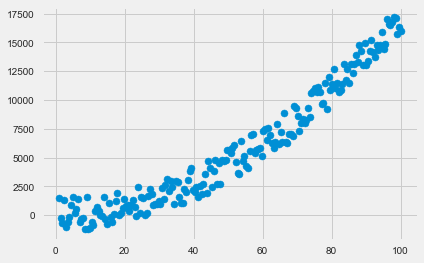

In [321]:
plt.scatter(x_2,y_2)

In [322]:
x_2, x_test, y_2, y_test = train_test_split(x_2, y_2, test_size=.2, random_state=10) 

In [323]:
interactions_2 = PolynomialFeatures(degree=2, interaction_only=False)
poly_x = interactions_2.fit_transform(sm.add_constant(x_2))
poly_test_x = interactions_2.fit_transform(sm.add_constant(x_test))

In [324]:
lr = LinearRegression()

In [325]:
lr.fit(poly_x, y_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [326]:
train_pred_y = lr.predict(poly_x)
test_pred_y = lr.predict(poly_test_x)

In [327]:
print('mean squared error on training data:', mean_squared_error(y_2, train_pred_y))

mean squared error on training data: 785032.754719


In [328]:
print('mean squared error on test data:', mean_squared_error(y_test, test_pred_y))

mean squared error on test data: 687301.07604


##### Challenge 3

For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

 * training error (MSE or RMSE)
 * test error (MSE or RMSE)
 * R squared

In [329]:
poly_list = np.arange(8)

In [330]:
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=.2, random_state=10) 
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=.2, random_state=10) 
training_errors_1 = []
test_errors_1 = []
r_2_1 = []
training_errors_2 = []
test_errors_2 = []
r_2_2 = []

for poly in poly_list:
    lr_1 = LinearRegression()
    lr_2 = LinearRegression()
    interactions_3 = PolynomialFeatures(degree=poly, interaction_only=False)
    poly_x_1 = interactions_3.fit_transform(sm.add_constant(x_1_train))
    poly_x_2 = interactions_3.fit_transform(sm.add_constant(x_2_train))
    poly_x_1_test = interactions_3.fit_transform(sm.add_constant(x_1_test))
    poly_x_2_test = interactions_3.fit_transform(sm.add_constant(x_2_test))
    lr_1.fit(poly_x_1, y_1_train)
    lr_2.fit(poly_x_2, y_2_train)

    y_1_train_pred = lr_1.predict(poly_x_1)
    y_2_train_pred = lr_2.predict(poly_x_2)
    y_1_test_pred = lr_1.predict(poly_x_1_test)
    y_2_test_pred = lr_2.predict(poly_x_2_test)

    training_errors_1.append(mean_squared_error(y_1_train_pred, y_1_train))
    test_errors_1.append(mean_squared_error(y_1_test_pred, y_1_test))
    r_2_1.append(lr_1.score(poly_x_1_test, y_1_test))
    training_errors_2.append(mean_squared_error(y_2_train, y_2_train_pred))
    test_errors_2.append(mean_squared_error(y_2_test, y_2_test_pred))
    r_2_2.append(lr_2.score(poly_x_2_test, y_2_test))
    

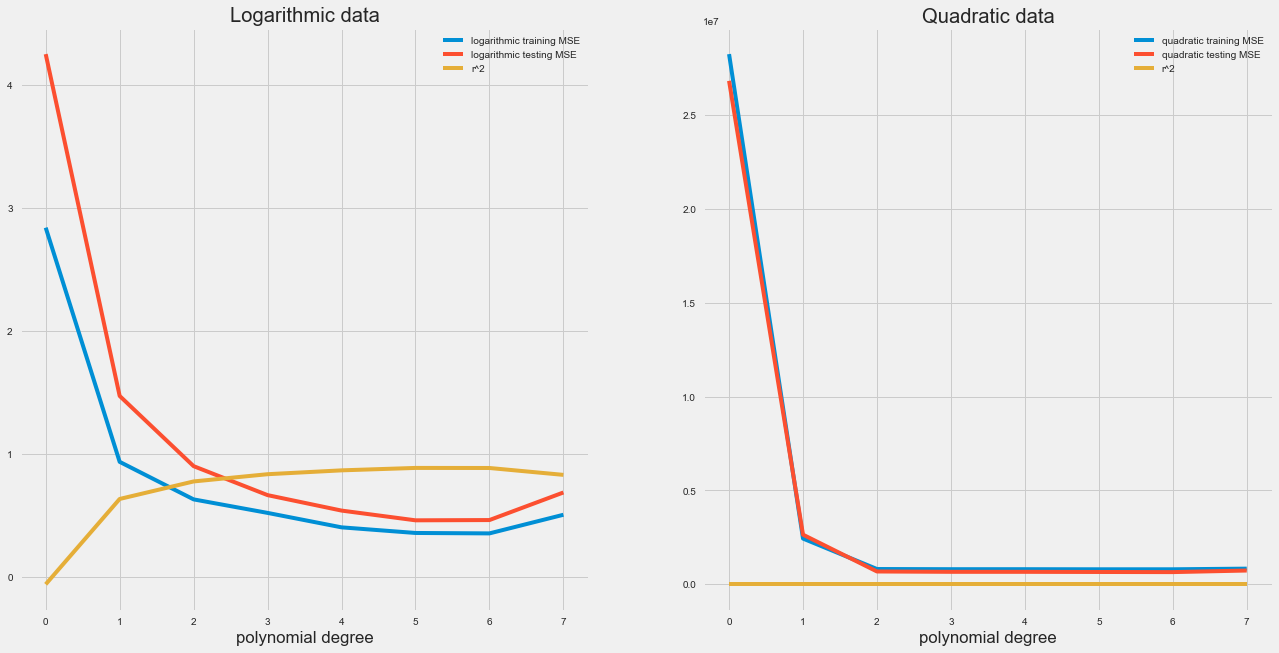

In [331]:

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(poly_list, training_errors_1, label="logarithmic training MSE")
plt.plot(poly_list, test_errors_1, label="logarithmic testing MSE")
plt.plot(poly_list, r_2_1, label="r^2")
plt.xlabel('polynomial degree')
plt.title('Logarithmic data')
plt.legend()
plt.subplot(1,2,2)
plt.plot(poly_list, training_errors_2, label="quadratic training MSE")
plt.plot(poly_list, test_errors_2, label="quadratic testing MSE")
plt.plot(poly_list, r_2_2, label="r^2")
plt.xlabel('polynomial degree')
plt.title('Quadratic data')
plt.legend()

Seems to be an error with the plot because the R^2 looks correct in the data, and also shows up correctly if called in a different chart..See below

[-0.042643089862273609, 0.89725467713540452, 0.97346860164738436, 0.97417567649755177, 0.97420047438428337, 0.9744950727935775, 0.97475637238581303, 0.97149088322396648]


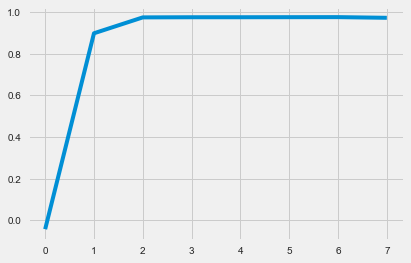

In [332]:
print(r_2_2)
plt.plot(poly_list, r_2_2, label="r^2")


##### Challenge 4

For the data from two (above), fit a model to only the first 5 of your data points (m=5). Then to first 10 (m=10). Then to first 15 (m=15). In this manner, keep fitting until you fit your entire training set. For each step, calculate the training error and the test error. Plot both (in the same plot) over m. This is called a learning curve.

In [333]:
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=.2, random_state=10) 
lr_2 = LinearRegression()
interactions_3 = PolynomialFeatures(degree=3, interaction_only=False)

data_count = np.arange(5,101,5)
poly_x_2 = interactions_3.fit_transform(sm.add_constant(x_2_train))
poly_x_2_test = interactions_3.fit_transform(sm.add_constant(x_2_test))

training_errors = []
test_errors = []
for data_points in data_count:
    lr_2.fit(poly_x_2[0:data_points], y_2_train[0:data_points])
    y_2_train_pred = lr_2.predict(poly_x_2[0:data_points])
    y_2_test_pred = lr_2.predict(poly_x_2_test[0:data_points])
    training_errors.append(mean_squared_error(y_2_train[0:data_points], y_2_train_pred[0:data_points]))
    test_errors.append(mean_squared_error(y_2_test[0:data_points], y_2_test_pred[0:data_points]))


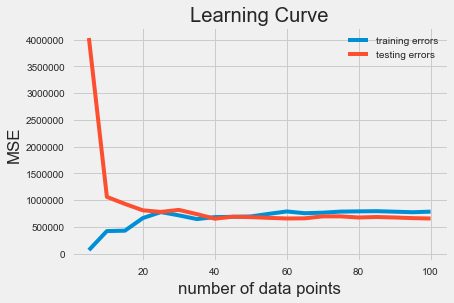

In [335]:
plt.plot(data_count, training_errors, label="training errors")
plt.plot(data_count, test_errors, label="testing errors")
plt.legend()
plt.xlabel('number of data points')
plt.ylabel('MSE')
plt.title('Learning Curve');